In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier
import numpy as np
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

In [2]:
data_classifier = pd.read_csv("D:\ML\data\weather_data.csv", delimiter=',')

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(data_classifier)

data_classifier = scaler.transform(data_classifier)
data_classifier = pd.DataFrame(data_classifier)

data_classifier = data_classifier[:10000]

balance = len(data_classifier.loc[data_classifier[16]==0])//len(data_classifier.loc[data_classifier[16]==1])

data_sample = data_classifier.loc[data_classifier[16]==1]
data_sample = data_sample.loc[data_sample.index.repeat(balance)]
data_n = pd.concat([data_classifier.loc[data_classifier[16]==0], data_sample]).sample(frac=1)

y_class = data_n[16]
X_class = data_n.drop([16], axis=1)
data_regressor = pd.read_csv("D:\ML\data\data.csv", delimiter=',')

y_reg = data_regressor["quality"]
X_reg = data_regressor.drop(["quality"], axis=1)

In [3]:
data_regressor.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kind_red,kind_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,1.0,0.0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0,1.0,0.0


In [4]:
data_regressor.shape

(5320, 14)

In [5]:
data_n.head()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
9710,0.643868,0.536862,0.000000,0.027586,0.020690,0.426357,0.184615,0.425287,0.740000,0.680000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
416,0.563679,0.795841,0.000000,0.037712,0.524909,0.387597,0.015385,0.252874,0.390000,0.180000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4937,0.441038,0.396975,0.003235,0.037712,0.524909,0.124031,0.084615,0.103448,0.980000,0.870000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1298,0.233491,0.379962,0.000000,0.037712,0.524909,0.069767,0.015385,0.080460,1.000000,0.530000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8841,0.726415,0.810964,0.006364,0.037712,0.524909,0.341085,0.215385,0.172414,0.688808,0.515391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
data_n.shape

(15697, 119)

In [7]:
def test_class(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
    bag = BaggingClassifier().fit(X_train, y_train)
    print(classification_report(y_test, bag.predict(X_test)))

In [8]:
def test_reg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
    model = LinearRegression().fit(X_train, y_train)
    print(f'R^2: {model.score(X_test, y_test)}')

In [9]:
test_class(X_class, y_class)

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95      2458
         1.0       0.91      0.99      0.95      2252

    accuracy                           0.95      4710
   macro avg       0.95      0.95      0.95      4710
weighted avg       0.95      0.95      0.95      4710



In [10]:
test_reg(X_reg, y_reg)

R^2: 0.2961962142532253


In [11]:
X_reg.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,kind_red,kind_white
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,0.255451,0.744549
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.436155,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,0.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,0.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,1.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000,1.000000


In [12]:
X_class.describe()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
count,15697.000000,15697.000000,15697.000000,15697.000000,15697.000000,15697.000000,15697.000000,15697.000000,15697.000000,15697.000000,...,15697.000000,15697.000000,15697.000000,15697.000000,15697.000000,15697.000000,15697.000000,15697.000000,15697.000000,15697.000000
mean,0.488571,0.532970,0.009895,0.038059,0.508235,0.237845,0.086570,0.178107,0.728300,0.539419,...,0.067911,0.078168,0.061094,0.057081,0.058928,0.066064,0.061986,0.063006,0.720711,0.279289
std,0.146237,0.134200,0.032809,0.018926,0.121855,0.104088,0.057850,0.087575,0.197874,0.230450,...,0.251601,0.268444,0.239511,0.232005,0.235498,0.248401,0.241138,0.242981,0.448664,0.448664
min,0.129717,0.219282,0.000000,0.000000,0.000000,0.007752,0.000000,0.000000,0.050000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370283,0.429112,0.000000,0.037712,0.524909,0.170543,0.046154,0.103448,0.600000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.490566,0.523629,0.000000,0.037712,0.524909,0.224806,0.084615,0.172414,0.750000,0.530000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.606132,0.625709,0.005391,0.037712,0.524909,0.294574,0.130769,0.229885,0.890000,0.710000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,0.900943,0.971645,1.000000,0.594483,0.944828,0.782946,0.369231,0.643678,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
vt1 = VarianceThreshold(1)
X_vt1 = vt1.fit_transform(X_reg)
X_vt1.shape

(5320, 5)

In [14]:
X_vt1 = pd.DataFrame(X_vt1, columns=vt1.get_feature_names_out())
X_vt1.head()

,fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,alcohol
0,7.4,1.9,11.0,34.0,9.4
1,7.8,2.6,25.0,67.0,9.8
2,7.8,2.3,15.0,54.0,9.8
3,11.2,1.9,17.0,60.0,9.8
4,7.4,1.8,13.0,40.0,9.4


In [15]:
test_reg(X_vt1, y_reg)

R^2: 0.233123258367119


In [16]:
vt2 = VarianceThreshold(0.05)
X_vt2 = vt2.fit_transform(X_class)
X_vt2.shape

(15697, 48)

In [17]:
X_vt2 = pd.DataFrame(X_vt2, columns=vt2.get_feature_names_out())
X_vt2.head()

,x9,x12,x13,x16,x17,x18,x21,x23,x29,x30,...,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117
0,0.680000,0.888889,0.888889,0.466667,0.818182,0.3,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.180000,0.494162,0.501103,0.666667,0.000000,0.3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.870000,0.494162,0.501103,0.300000,0.454545,0.7,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.530000,0.888889,0.501103,0.666667,0.545455,0.5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.515391,0.494162,0.333333,0.666667,0.909091,0.9,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
test_class(X_vt2, y_class)

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94      2458
         1.0       0.90      0.98      0.94      2252

    accuracy                           0.94      4710
   macro avg       0.94      0.94      0.94      4710
weighted avg       0.95      0.94      0.94      4710



In [19]:
scaler1 = StandardScaler()
X_scaled1 = scaler1.fit_transform(X_reg)
X_scaled1 = pd.DataFrame(X_scaled1, columns=X_reg.columns)
X_scaled1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,kind_red,kind_white
0,0.140064,2.115349,-2.164515,-0.699699,0.523880,-1.069272,-1.411143,1.100996,1.779304,0.177941,-0.969152,1.707233,-1.707233
1,0.443199,3.185297,-2.164515,-0.544135,1.120736,-0.282905,-0.829839,0.763753,-0.153797,0.979389,-0.631833,1.707233,-1.707233
2,0.443199,2.471998,-1.892672,-0.610806,0.957957,-0.844596,-1.058837,0.831202,0.220351,0.779027,-0.631833,1.707233,-1.707233
3,3.019841,-0.381197,1.641293,-0.699699,0.496751,-0.732258,-0.953146,1.168444,-0.403229,0.311515,-0.631833,1.707233,-1.707233
4,0.140064,1.877583,-2.164515,-0.721923,0.496751,-0.956934,-1.305451,1.100996,1.779304,0.177941,-0.969152,1.707233,-1.707233


In [20]:
X_scaled1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,kind_red,kind_white
count,5.320000e+03,5.320000e+03,5.320000e+03,5320.000000,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03
mean,3.205456e-16,-6.410912e-17,2.671213e-17,0.000000,1.282182e-16,2.136971e-17,-8.547883e-17,1.857027e-14,6.197215e-16,-2.136971e-17,6.624609e-16,8.547883e-17,-8.547883e-17
std,1.000094e+00,1.000094e+00,1.000094e+00,1.000094,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00
min,-2.588145e+00,-1.570028e+00,-2.164515e+00,-0.988604,-1.293816e+00,-1.630964e+00,-1.904371e+00,-2.504125e+00,-3.146985e+00,-2.092831e+00,-2.149768e+00,-5.857433e-01,-1.707233e+00
25%,-6.177717e-01,-6.784048e-01,-5.334545e-01,-0.721923,-5.070517e-01,-7.884267e-01,-7.065318e-01,-7.875618e-01,-7.150198e-01,-6.902954e-01,-8.848223e-01,-5.857433e-01,-1.707233e+00
50%,-1.630701e-01,-2.623138e-01,-5.772841e-02,-0.521912,-2.628836e-01,-1.143971e-01,3.331010e-02,3.868208e-02,-9.143899e-02,-1.559963e-01,-1.258547e-01,-5.857433e-01,5.857433e-01
75%,3.674151e-01,3.915434e-01,5.539194e-01,0.544812,2.525824e-01,6.158017e-01,6.894794e-01,7.536359e-01,6.568580e-01,4.450903e-01,7.174425e-01,1.707233e+00,5.857433e-01
max,6.581671e+00,7.346207e+00,9.116989e+00,13.501067,1.503832e+01,1.454575e+01,5.740662e+00,1.498864e+01,4.897208e+00,9.795325e+00,3.668983e+00,1.707233e+00,5.857433e-01


In [21]:
vt3 = VarianceThreshold(0.1)
X_vt3 = vt3.fit_transform(X_scaled1)
print(X_vt3.shape)
test_reg(X_vt3, y_reg)

(5320, 13)
R^2: 0.31915422400460214


In [22]:
scaler2 = StandardScaler()
X_scaled2 = scaler2.fit_transform(X_class)
X_scaled2 = pd.DataFrame(X_scaled2, columns=X_class.columns)
X_scaled2.head()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
0,1.061988,0.029005,-0.301603,-0.553368,-4.001146,1.811143,1.694877,2.822572,0.059131,0.610049,...,-0.269924,-0.291198,-0.255088,-0.246042,-0.250237,-0.265964,-0.257065,-0.259311,0.62251,-0.62251
1,0.513625,1.958868,-0.301603,-0.018342,0.136841,1.438755,-1.230571,0.853763,-1.709731,-1.559691,...,-0.269924,-0.291198,-0.255088,-0.246042,-0.250237,-0.265964,3.890062,-0.259311,0.62251,-0.62251
2,-0.325049,-1.013402,-0.203014,-0.018342,0.136841,-1.093479,-0.033797,-0.852538,1.272066,1.434550,...,-0.269924,-0.291198,-0.255088,-0.246042,-0.250237,-0.265964,-0.257065,3.856370,-1.60640,1.60640
3,-1.744343,-1.140181,-0.301603,-0.018342,0.136841,-1.614821,-1.230571,-1.115046,1.373143,-0.040873,...,-0.269924,-0.291198,-0.255088,4.064354,-0.250237,-0.265964,-0.257065,-0.259311,0.62251,-0.62251
4,1.626480,2.071561,-0.107636,-0.018342,0.136841,0.991890,2.226777,-0.065015,-0.199586,-0.104268,...,-0.269924,-0.291198,-0.255088,-0.246042,-0.250237,-0.265964,-0.257065,-0.259311,0.62251,-0.62251


In [23]:
X_scaled2.describe()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
count,1.569700e+04,1.569700e+04,1.569700e+04,1.569700e+04,1.569700e+04,1.569700e+04,1.569700e+04,1.569700e+04,1.569700e+04,1.569700e+04,...,1.569700e+04,1.569700e+04,1.569700e+04,1.569700e+04,1.569700e+04,1.569700e+04,1.569700e+04,1.569700e+04,1.569700e+04,1.569700e+04
mean,4.073953e-16,-8.274652e-16,-6.654124e-17,-3.838569e-16,-4.938537e-16,3.168630e-16,3.530760e-17,2.806501e-17,-1.864965e-16,-3.213897e-16,...,-2.263307e-18,-2.444372e-17,-2.263307e-19,-4.164486e-17,7.287850e-17,-4.526615e-18,2.263307e-17,-9.007964e-17,-7.468915e-17,7.468915e-17
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,...,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,-2.453989e+00,-2.337541e+00,-3.016032e-01,-2.010975e+00,-4.170940e+00,-2.210641e+00,-1.496521e+00,-2.033824e+00,-3.428054e+00,-2.297402e+00,...,-2.699241e-01,-2.911978e-01,-2.550880e-01,-2.460416e-01,-2.502368e-01,-2.659637e-01,-2.570653e-01,-2.593112e-01,-1.606400e+00,-6.225101e-01
25%,-8.088991e-01,-7.739300e-01,-3.016032e-01,-1.834236e-02,1.368412e-01,-6.466141e-01,-6.986713e-01,-8.525381e-01,-6.484134e-01,-7.351898e-01,...,-2.699241e-01,-2.911978e-01,-2.550880e-01,-2.460416e-01,-2.502368e-01,-2.659637e-01,-2.570653e-01,-2.593112e-01,-1.606400e+00,-6.225101e-01
50%,1.364607e-02,-6.960062e-02,-3.016032e-01,-1.834236e-02,1.368412e-01,-1.252718e-01,-3.379663e-02,-6.501450e-02,1.096704e-01,-4.087298e-02,...,-2.699241e-01,-2.911978e-01,-2.550880e-01,-2.460416e-01,-2.502368e-01,-2.659637e-01,-2.570653e-01,-2.593112e-01,6.225101e-01,-6.225101e-01
75%,8.039346e-01,6.910751e-01,-1.372883e-01,-1.834236e-02,1.368412e-01,5.450255e-01,7.640529e-01,5.912552e-01,8.172152e-01,7.402334e-01,...,-2.699241e-01,-2.911978e-01,-2.550880e-01,-2.460416e-01,-2.502368e-01,-2.659637e-01,-2.570653e-01,-2.593112e-01,6.225101e-01,1.606400e+00
max,2.819977e+00,3.268921e+00,3.017881e+01,2.940045e+01,3.582999e+00,5.237106e+00,4.886276e+00,5.316397e+00,1.373143e+00,1.998683e+00,...,3.704746e+00,3.434092e+00,3.920216e+00,4.064354e+00,3.996214e+00,3.759911e+00,3.890062e+00,3.856370e+00,6.225101e-01,1.606400e+00


In [24]:
vt4 = VarianceThreshold(0.9)
X_vt4 = vt4.fit_transform(X_scaled2)
print(X_vt4.shape)
test_class(X_vt4, y_class)

(15697, 73)
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      2458
         1.0       0.92      0.98      0.95      2252

    accuracy                           0.95      4710
   macro avg       0.95      0.95      0.95      4710
weighted avg       0.95      0.95      0.95      4710



In [25]:
skb1 = SelectKBest(k=5)
X_skb1 = skb1.fit_transform(X_reg, y_reg)
test_reg(X_skb1, y_reg)

R^2: 0.27243248537992715


In [26]:
skb2 = SelectKBest(k=20)
X_skb2 = skb2.fit_transform(X_class, y_class)
test_class(X_skb2, y_class)

D:\ML\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19 20 22 24 25 26 27 28 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
D:\ML\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94      2458
         1.0       0.91      0.98      0.94      2252

    accuracy                           0.94      4710
   macro avg       0.94      0.94      0.94      4710
weighted avg       0.95      0.94      0.94      4710



In [27]:
X_skb1 = pd.DataFrame(X_skb1, columns=skb1.get_feature_names_out())
X_skb1

,volatile acidity,chlorides,density,alcohol,kind_white
0,0.70,0.076,0.99780,9.4,0.0
1,0.88,0.098,0.99680,9.8,0.0
2,0.76,0.092,0.99700,9.8,0.0
3,0.28,0.075,0.99800,9.8,0.0
4,0.66,0.075,0.99780,9.4,0.0
...,...,...,...,...,...
5315,0.21,0.039,0.99114,11.2,1.0
5316,0.32,0.047,0.99490,9.6,1.0
5317,0.24,0.041,0.99254,9.4,1.0
5318,0.29,0.022,0.98869,12.8,1.0


In [28]:
X_skb2 = pd.DataFrame(X_skb2, columns=skb2.get_feature_names_out())
X_skb2

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x15,x29,x30,x113,x116,x117
0,0.643868,0.536862,0.000000,0.027586,0.020690,0.426357,0.184615,0.425287,0.740000,0.680000,0.456198,0.3872,0.888889,0.888889,0.529750,0.0,1.0,0.0,1.0,0.0
1,0.563679,0.795841,0.000000,0.037712,0.524909,0.387597,0.015385,0.252874,0.390000,0.180000,0.499174,0.4960,0.494162,0.501103,0.761996,0.0,0.0,0.0,1.0,0.0
2,0.441038,0.396975,0.003235,0.037712,0.524909,0.124031,0.084615,0.103448,0.980000,0.870000,0.836364,0.8096,0.494162,0.501103,0.395393,0.0,0.0,0.0,0.0,1.0
3,0.233491,0.379962,0.000000,0.037712,0.524909,0.069767,0.015385,0.080460,1.000000,0.530000,0.869421,0.8512,0.888889,0.501103,0.387716,0.0,0.0,0.0,1.0,0.0
4,0.726415,0.810964,0.006364,0.037712,0.524909,0.341085,0.215385,0.172414,0.688808,0.515391,0.570248,0.5520,0.494162,0.333333,0.831094,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15692,0.716981,0.563327,0.001617,0.095172,0.524909,0.263839,0.053846,0.126437,0.530000,0.930000,0.517355,0.5984,0.777778,0.777778,0.477927,1.0,0.0,0.0,1.0,0.0
15693,0.344340,0.436673,0.000539,0.037712,0.524909,0.124031,0.000000,0.080460,0.990000,0.630000,0.563636,0.5136,0.494162,0.501103,0.435701,0.0,0.0,0.0,1.0,0.0
15694,0.481132,0.663516,0.000000,0.037712,0.524909,0.209302,0.046154,0.218391,0.670000,0.300000,0.629752,0.6048,0.494162,0.501103,0.642994,0.0,0.0,0.0,1.0,0.0
15695,0.497642,0.385633,0.067925,0.012414,0.000000,0.395349,0.169231,0.229885,0.910000,0.960000,0.651240,0.6304,0.888889,0.888889,0.358925,0.0,1.0,0.0,0.0,1.0


In [29]:
tree1 = DecisionTreeClassifier().fit(X_reg, y_reg)
rfe1 = RFE(estimator=tree1, n_features_to_select=12, step=2).fit(X_reg, y_reg)
X_rfe1 = pd.DataFrame(rfe1.transform(X_reg), columns=rfe1.get_feature_names_out())
X_rfe1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,kind_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1.0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0.0
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0.0
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0.0
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0.0


In [30]:
test_reg(X_rfe1, y_reg)

R^2: 0.30022999680763895


In [31]:
tree2 = DecisionTreeClassifier().fit(X_class, y_class)
rfe2 = RFE(estimator=tree2, n_features_to_select=15, step=2).fit(X_class, y_class)
X_rfe2 = pd.DataFrame(rfe2.transform(X_class), columns=rfe2.get_feature_names_out())
X_rfe2

,x0,x1,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
0,0.643868,0.536862,0.426357,0.184615,0.425287,0.740000,0.680000,0.456198,0.3872,0.888889,0.888889,0.584388,0.529750,0.466667,0.818182
1,0.563679,0.795841,0.387597,0.015385,0.252874,0.390000,0.180000,0.499174,0.4960,0.494162,0.501103,0.624473,0.761996,0.666667,0.000000
2,0.441038,0.396975,0.124031,0.084615,0.103448,0.980000,0.870000,0.836364,0.8096,0.494162,0.501103,0.424051,0.395393,0.300000,0.454545
3,0.233491,0.379962,0.069767,0.015385,0.080460,1.000000,0.530000,0.869421,0.8512,0.888889,0.501103,0.261603,0.387716,0.666667,0.545455
4,0.726415,0.810964,0.341085,0.215385,0.172414,0.688808,0.515391,0.570248,0.5520,0.494162,0.333333,0.784810,0.831094,0.666667,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15692,0.716981,0.563327,0.263839,0.053846,0.126437,0.530000,0.930000,0.517355,0.5984,0.777778,0.777778,0.668776,0.477927,0.633333,0.909091
15693,0.344340,0.436673,0.124031,0.000000,0.080460,0.990000,0.630000,0.563636,0.5136,0.494162,0.501103,0.320675,0.435701,0.366667,0.545455
15694,0.481132,0.663516,0.209302,0.046154,0.218391,0.670000,0.300000,0.629752,0.6048,0.494162,0.501103,0.514768,0.642994,0.266667,0.181818
15695,0.497642,0.385633,0.395349,0.169231,0.229885,0.910000,0.960000,0.651240,0.6304,0.888889,0.888889,0.421941,0.358925,0.366667,0.454545


In [32]:
test_class(X_rfe2, y_class)

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94      2458
         1.0       0.91      0.98      0.94      2252

    accuracy                           0.94      4710
   macro avg       0.94      0.94      0.94      4710
weighted avg       0.95      0.94      0.94      4710



<BarContainer object of 13 artists>

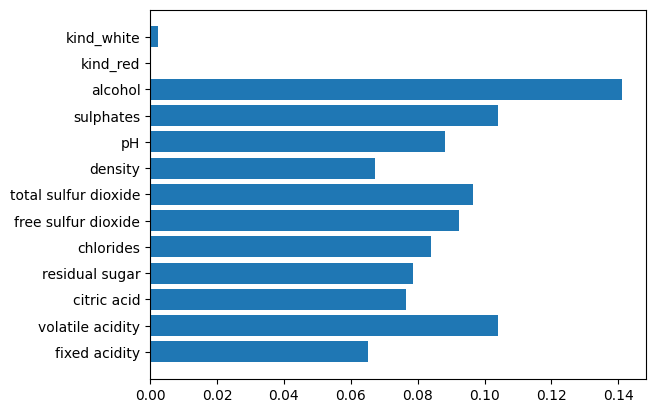

In [33]:
plt.barh(width=tree1.feature_importances_, y=X_reg.columns)

<BarContainer object of 118 artists>

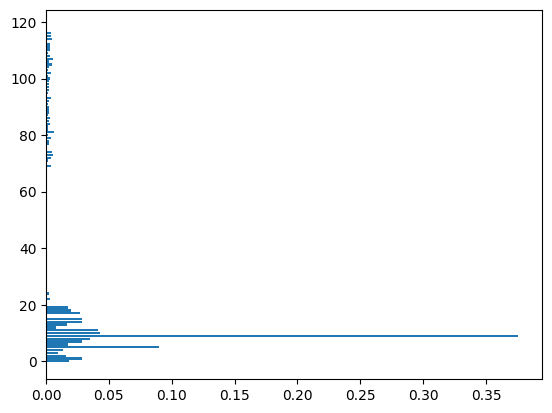

In [34]:
plt.barh(width=tree2.feature_importances_, y=X_class.columns)

In [35]:
#Модель для классификации - knn, для регресии - полином

In [36]:
pca = PCA(n_components=2)
X_pca_clf = pca.fit_transform(X_class, y_class)
X_pca_clf.shape

(15697, 2)

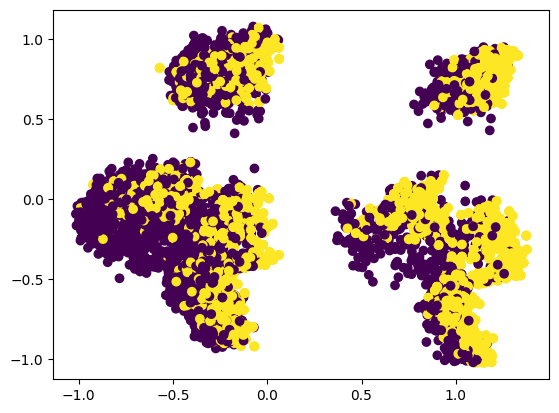

In [37]:
plt.scatter(X_pca_clf[:,0], X_pca_clf[:,1], c=y_class)

In [38]:
sum(pca.explained_variance_ratio_)

0.18014886136913974

In [39]:
test_class(X_pca_clf, y_class)

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91      2458
         1.0       0.85      0.98      0.91      2252

    accuracy                           0.91      4710
   macro avg       0.91      0.91      0.91      4710
weighted avg       0.92      0.91      0.91      4710



In [40]:
pca_2 = PCA(n_components=3)
X_pca_2_clf = pca_2.fit_transform(X_class, y_class)
test_class(X_pca_2_clf, y_class)

              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92      2458
         1.0       0.87      0.98      0.92      2252

    accuracy                           0.92      4710
   macro avg       0.93      0.92      0.92      4710
weighted avg       0.93      0.92      0.92      4710



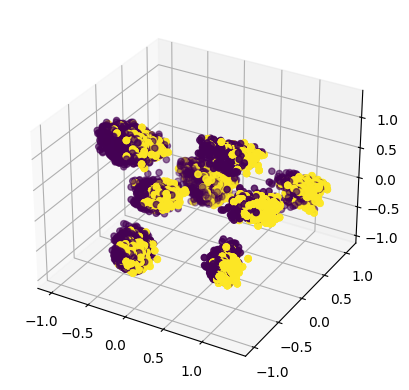

In [41]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_2_clf[:,0], X_pca_2_clf[:,1], X_pca_2_clf[:,2], c=y_class);

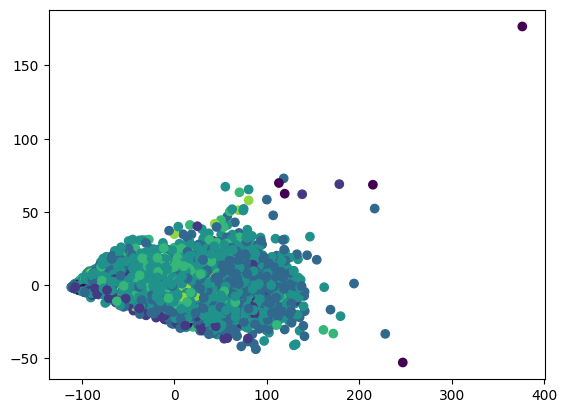

In [42]:
pca = PCA(n_components=2)
X_pca_reg = pca.fit_transform(X_reg, y_reg)
X_pca_reg.shape
plt.scatter(X_pca_reg[:,0], X_pca_reg[:,1], c=y_reg);

In [43]:
sum(pca.explained_variance_ratio_)
test_reg(X_pca_reg, y_reg)

R^2: 0.0200358597330641


In [44]:
pca_2 = PCA(n_components=3)
X_pca_2_reg = pca_2.fit_transform(X_reg, y_reg)
test_reg(X_pca_2_reg, y_reg)

R^2: 0.015390187425730617


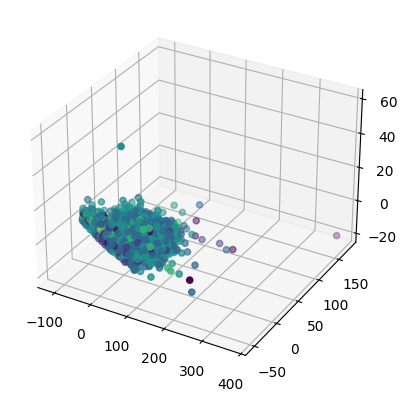

In [45]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_2_reg[:,0], X_pca_2_reg[:,1], X_pca_2_reg[:,2], c=y_reg);

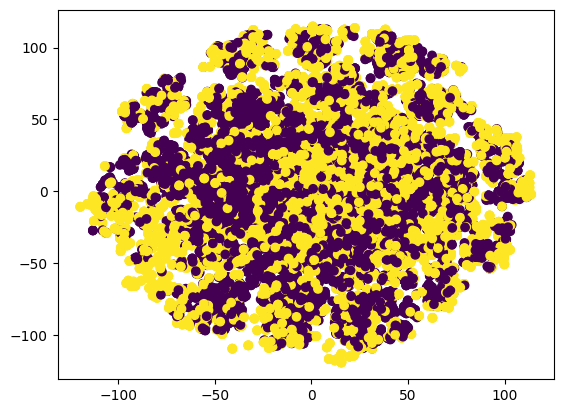

In [46]:
tsne = TSNE(n_components=2)
X_tsne_clf = tsne.fit_transform(X_scaled2)
plt.scatter(X_tsne_clf[:,0], X_tsne_clf[:,1], c=y_class);

In [47]:
test_class(X_tsne_clf, y_class)

              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91      2458
         1.0       0.86      0.97      0.91      2252

    accuracy                           0.91      4710
   macro avg       0.91      0.91      0.91      4710
weighted avg       0.92      0.91      0.91      4710



D:\ML\venv\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 37 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: 

D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensi

D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensi

D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensi

D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensi

D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensi

D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
D:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensi

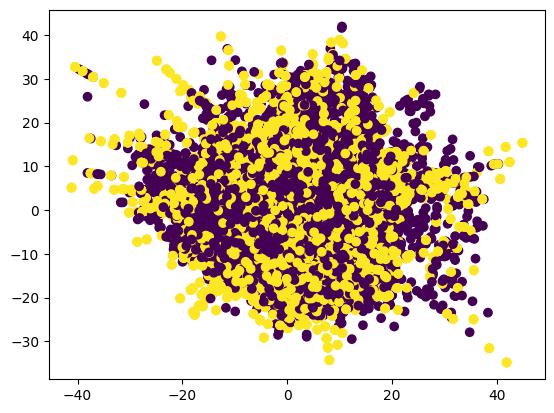

In [48]:
isomap = Isomap(n_components=2)
X_isomap_clf = isomap.fit_transform(X_scaled2)
plt.scatter(X_isomap_clf[:,0], X_isomap_clf[:,1], c=y_class)

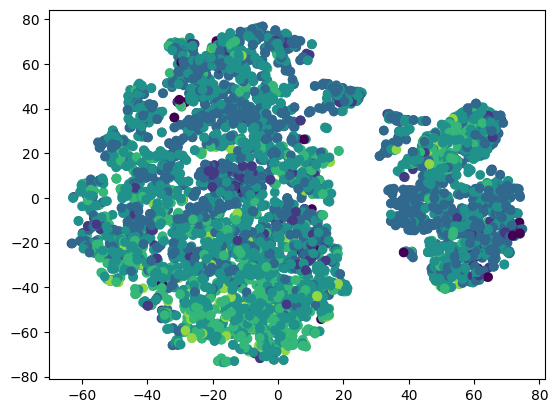

In [49]:
tsne = TSNE(n_components=2)
X_tsne_reg = tsne.fit_transform(X_scaled1)
plt.scatter(X_tsne_reg[:,0], X_tsne_reg[:,1], c=y_reg)

In [50]:
test_reg(X_tsne_reg, y_reg)

R^2: 0.08096068990795158


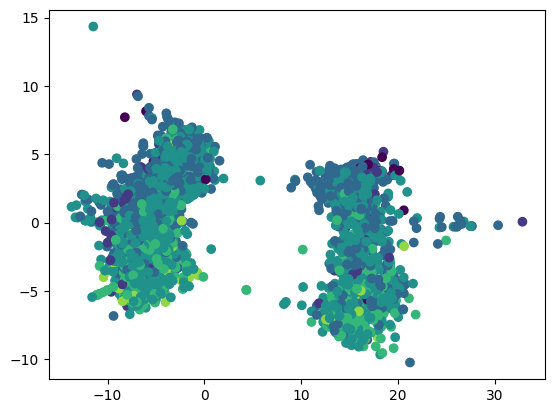

In [51]:
isomap = Isomap(n_components=2)
X_isomap_reg = isomap.fit_transform(X_scaled1)
plt.scatter(X_isomap_reg[:,0], X_isomap_reg[:,1], c=y_reg);

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe1, y_reg, test_size=0.3, shuffle=True)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {model.score(X_test, y_test)}')

MAE: 0.5682756468052568
MSE: 0.5428921483285171
RMSE: 0.7368121526742871
MAPE: 0.3211682547521463
R^2: 0.29593303092458656


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe2, y_class, test_size=0.3, shuffle=True)

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)
y_bin_knn_pred = knn.predict(X_test)
accuracy_score(y_test, y_bin_knn_pred)

0.8112526539278132

In [62]:
class PCA:
    def __init__(self, n_feature=2):
        self.n_feature = n_feature
    
    def centered(self, X):
        X = X - np.mean(X , axis = 0)
        X = X/np.std(X , axis = 0)
        return X
    
    def sort(self, eigen_values, eigen_vectors):
        sorted_index = np.argsort(eigen_values)[::-1]
        sorted_eigenvalue = eigen_values[sorted_index]
        sorted_eigenvectors = eigen_vectors[:,sorted_index]
        return sorted_eigenvectors
    
    def fit(self, X):
        X = self.centered(X)
        data = np.array(X)
        cov_matrix = np.cov(data, bias=True, rowvar = False)
        eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)
        sorted_eigenvectors = self.sort(eigen_values, eigen_vectors)
        eigenvector_subset = sorted_eigenvectors[:,0:self.n_feature]
        newData = np.dot(eigenvector_subset.transpose(), data.transpose()).transpose()
        return newData

pca1 = PCA()
NewDataset1 = pca1.fit(X_class)
test_class(NewDataset1, y_class)

              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90      2458
         1.0       0.85      0.97      0.90      2252

    accuracy                           0.90      4710
   macro avg       0.91      0.90      0.90      4710
weighted avg       0.91      0.90      0.90      4710



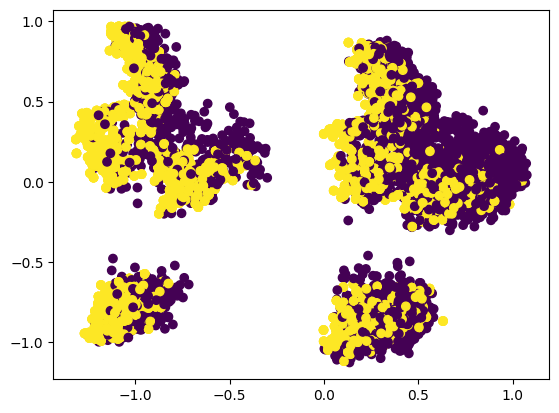

In [55]:
plt.scatter(NewDataset1[:,0], NewDataset1[:,1], c=y_class);

In [56]:
import sys
sys.path.append('D:\ML\mylib')
from KMeans import KMeans

k1 = KMeans(k=2)
y_pred1 = k1.fit(NewDataset1)
print('Внешние меры оценки качества')
print('')
print(f'Индекс Adjusted Rand: {adjusted_rand_score(y_pred1, y_class)}')
print(f'Индекс Rand: {rand_score(y_pred1, y_class)}')
print('')
print('Внутренние меры оценки качества')
print(f'Силуэт: {silhouette_score(NewDataset1, y_pred1)}')
print(f'Индекс Дэвиcа-Болдуина: {davies_bouldin_score(NewDataset1, y_pred1)}')

Внешние меры оценки качества

Индекс Adjusted Rand: 0.10127604808818826
Индекс Rand: 0.5507230551141238

Внутренние меры оценки качества
Силуэт: 0.5464347062134834
Индекс Дэвиcа-Болдуина: 0.8075791389099412


In [57]:
import sys
sys.path.append('D:\ML\myLib')
from Class1 import LinerRegression

y_reg = data_regressor["quality"]
X_reg = data_regressor.drop(["quality"], axis=1)

model_test = LinearRegression()
model_test.fit(X_reg, y_reg)
y_pred = model_test.predict(X_reg)

In [58]:
model_test.coef_

array([ 7.70340522e-02, -1.34413533e+00,  1.23645738e-01,  5.42847679e-02,
       -9.16911362e-01,  5.86727450e-03, -1.55451979e-03, -9.96174789e+01,
        6.17174175e-01,  7.46275995e-01,  2.30265739e-01,  1.60966277e-01,
       -1.60966277e-01])

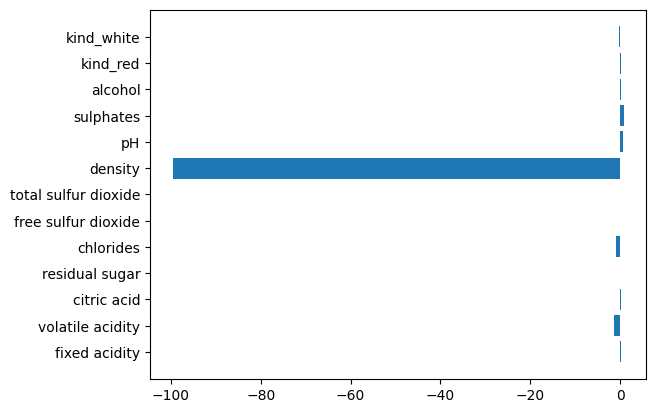

In [59]:
plt.barh(width=model_test.coef_, y=X_reg.columns);